In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def string_to_list(string):
    no_whitespace = ''.join(string.split())
    lst = list(no_whitespace.split(','))
    return lst

data_filepath = 'languageAblationResults.csv'
df = pd.read_csv(data_filepath)
df['TrainList'] = df['TrainLang'].apply(string_to_list)
df

,TrainLang,TestLang,Datasource,Test,Dev,TrainList
0,DE,EN,WikiNews,0.623,0.636,[DE]
1,"DE, ES",EN,WikiNews,0.618,0.637,"[DE, ES]"
2,ES,EN,WikiNews,0.616,0.638,[ES]
3,DE,EN,Wikipedia,0.626,0.644,[DE]
4,"DE, ES",EN,Wikipedia,0.628,0.644,"[DE, ES]"
5,ES,EN,Wikipedia,0.631,0.652,[ES]
6,DE,EN,News,0.670,0.656,[DE]
7,"DE, ES",EN,News,0.671,0.656,"[DE, ES]"
8,ES,EN,News,0.672,0.659,[ES]
9,EN,ES,NaN,0.691,0.700,[EN]


In [4]:
def test_not_in_train(row):
#     test = row['Training Language']
    trainlist = row['TrainList']
    testlang = row['TestLang']
    result = not (testlang in trainlist)
    return result


no_self_test = df.loc[df.apply(test_not_in_train, axis=1)]

In [5]:
test_fr = df.loc[df['TestLang'] == 'DE']
test_en = df.loc[df['TestLang']  == 'EN']
test_es = df.loc[df['TestLang']  == 'ES']
test_de = df.loc[df['TestLang']  == 'FR']

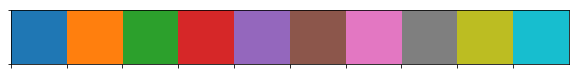

In [13]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [14]:
h_order = ['DE', 'EN', 'ES', 'DE, EN', 'EN, ES' ,'DE, ES', 'DE, EN, ES']
c_order = current_palette
# c_order = sns.husl_palette()

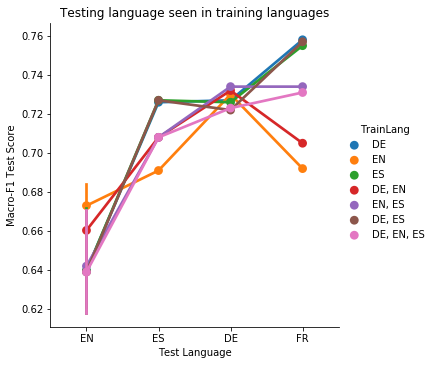

In [15]:
ax = sns.catplot('TestLang', 'Test', data=df, hue='TrainLang', hue_order=h_order, palette=c_order, kind="point")
ax.set(xlabel='Test Language', ylabel='Macro-F1 Test Score', title='Testing language seen in training languages')
plt.show()

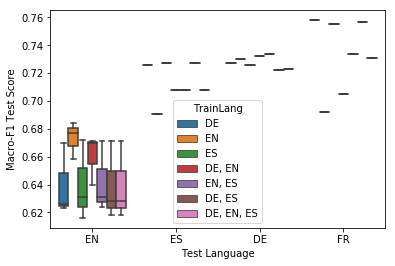

In [16]:
# ax = sns.boxplot('TestLang', 'Test', data=df[df['TestLang'] == 'EN'], hue='TrainLang', hue_order=h_order, palette=c_order)
ax = sns.boxplot('TestLang', 'Test', data=df, hue='TrainLang', hue_order=h_order, palette=c_order)
ax.set(xlabel='Test Language', ylabel='Macro-F1 Test Score')
plt.show()

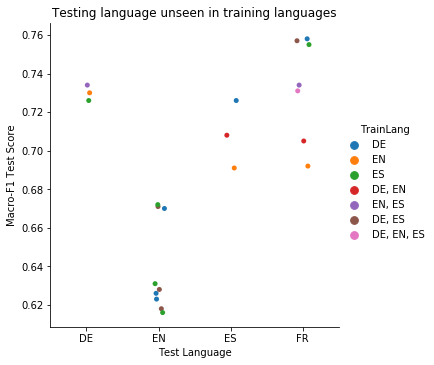

In [17]:
ax = sns.catplot('TestLang', 'Test', data=no_self_test, hue='TrainLang', hue_order=h_order, palette=c_order,order=['DE', 'EN', 'ES', 'FR'])
ax.set(xlabel='Test Language', ylabel='Macro-F1 Test Score', title='Testing language unseen in training languages')
plt.show()

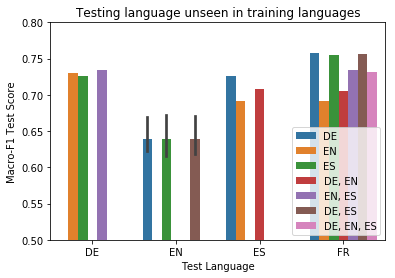

In [18]:
ax = sns.barplot('TestLang', 'Test', data=no_self_test, hue='TrainLang', hue_order=h_order, palette=c_order,order=['DE', 'EN', 'ES', 'FR'])
ax.set(xlabel='Test Language', ylabel='Macro-F1 Test Score', title='Testing language unseen in training languages')
ax.legend(loc='lower right')
plt.ylim(0.5, 0.8)
plt.show()

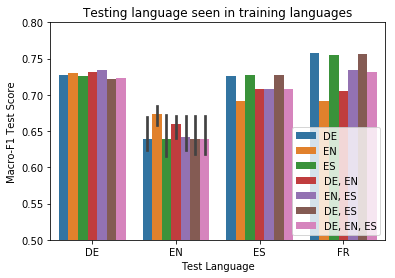

In [19]:
ax = sns.barplot('TestLang', 'Test', data=df, hue='TrainLang', hue_order=h_order, palette=c_order,order=['DE', 'EN', 'ES', 'FR'])
ax.set(xlabel='Test Language', ylabel='Macro-F1 Test Score', title='Testing language seen in training languages')
ax.legend(loc='lower right')
plt.ylim(0.5, 0.8)
plt.show()